# Reference
- Erik Linder-Norén, "PyTorch-GAN", GitHub repository, https://github.com/eriklindernoren/PyTorch-GAN


# WGAN

## Import libraries

In [ ]:
import argparse
import os
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch

os.makedirs("images", exist_ok=True)

def weights_init_normal(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find("BatchNorm") != -1:
        torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
        torch.nn.init.constant_(m.bias.data, 0.0)


## Option

In [ ]:
class Option():
    n_epochs = 200 # number of epochs of training
    batch_size = 64 # size of the batches
    lr = 0.00005 # learning rate
    n_cpu = 8 # number of cpu threads to use during batch generation
    latent_dim = 100 # dimensionality of the latent space
    n_critic = 5 # number of critics
    img_size = 28 # size of each image dimension
    channels = 1 # number of image channels
    clip_value = 0.01  # lower and upper clip value for disc. weights
    sample_interval = 500 # interval between image sampling

opt = Option()
cuda = True if torch.cuda.is_available() else False
img_shape = (opt.channels, opt.img_size, opt.img_size)

## Models

In [ ]:

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        def block(in_feat, out_feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(opt.latent_dim, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(img.shape[0], *img_shape)
        return img


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(int(np.prod(img_shape)), 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
        )

    def forward(self, img):
        img_flat = img.view(img.shape[0], -1)
        validity = self.model(img_flat)
        return validity

## Loss & Optimizer

In [ ]:

# Initialize generator and discriminator
generator = Generator()
discriminator = Discriminator()

if cuda:
    generator.cuda()
    discriminator.cuda()

# Configure data loader
os.makedirs("../../data/mnist", exist_ok=True)
dataloader = torch.utils.data.DataLoader(
    datasets.MNIST(
        "../../data/mnist",
        train=True,
        download=True,
        transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])]),
    ),
    batch_size=opt.batch_size,
    shuffle=True,
)

# Optimizers
optimizer_G = torch.optim.RMSprop(generator.parameters(), lr=opt.lr)
optimizer_D = torch.optim.RMSprop(discriminator.parameters(), lr=opt.lr)

Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../../data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../../data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../../data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../../data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/mnist/MNIST/raw



## Training

[Epoch 0/200] [Batch 0/938] [D loss: 0.077468] [G loss: 0.001567]


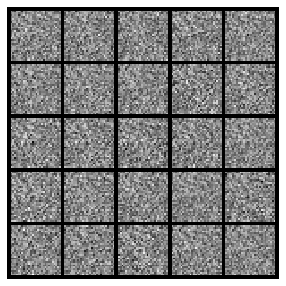

[Epoch 0/200] [Batch 500/938] [D loss: -2.416172] [G loss: -20.487719]


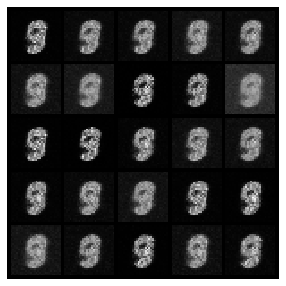

[Epoch 1/200] [Batch 62/938] [D loss: -0.439381] [G loss: -16.084290]


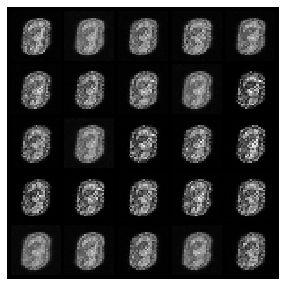

[Epoch 1/200] [Batch 562/938] [D loss: -0.287152] [G loss: -13.152558]


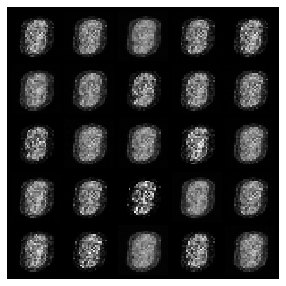

[Epoch 2/200] [Batch 124/938] [D loss: -0.127750] [G loss: -13.144810]


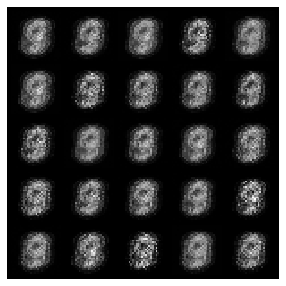

[Epoch 2/200] [Batch 624/938] [D loss: -0.046595] [G loss: -12.010393]


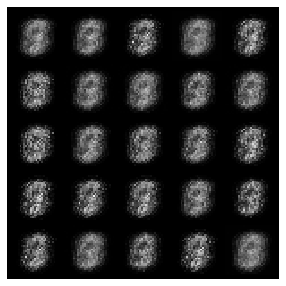

[Epoch 3/200] [Batch 186/938] [D loss: -0.080141] [G loss: -0.121849]


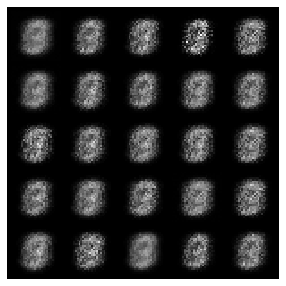

[Epoch 3/200] [Batch 686/938] [D loss: -0.167245] [G loss: -0.219432]


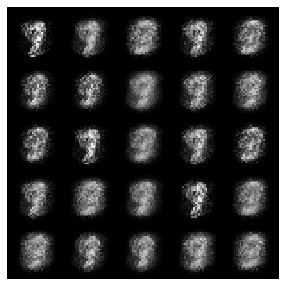

[Epoch 4/200] [Batch 248/938] [D loss: -0.126374] [G loss: -0.597152]


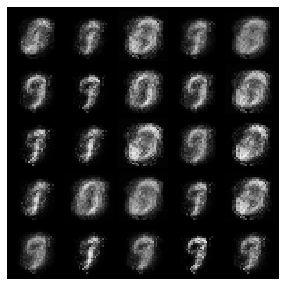

[Epoch 4/200] [Batch 748/938] [D loss: -0.152030] [G loss: -0.652851]


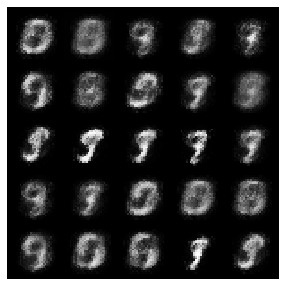

[Epoch 5/200] [Batch 310/938] [D loss: -0.133963] [G loss: -0.450592]


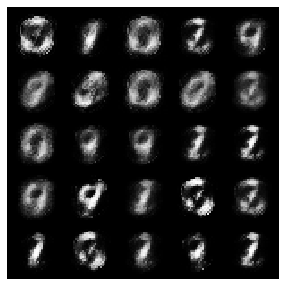

[Epoch 5/200] [Batch 810/938] [D loss: -0.091294] [G loss: -0.792879]


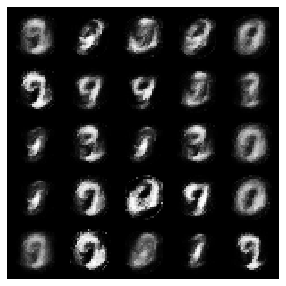

[Epoch 6/200] [Batch 372/938] [D loss: -0.252282] [G loss: 0.556957]


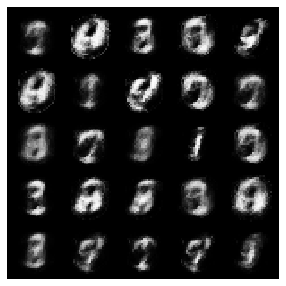

[Epoch 6/200] [Batch 872/938] [D loss: -0.284885] [G loss: 0.418142]


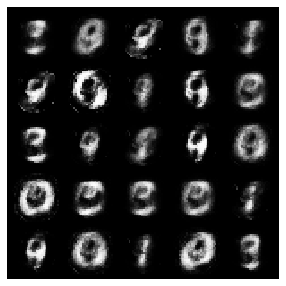

[Epoch 7/200] [Batch 434/938] [D loss: -0.261202] [G loss: -0.464228]


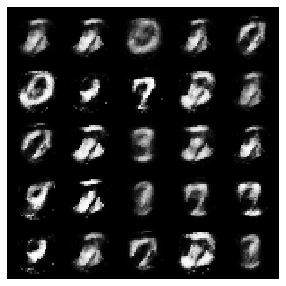

[Epoch 7/200] [Batch 934/938] [D loss: -0.279200] [G loss: -0.702159]


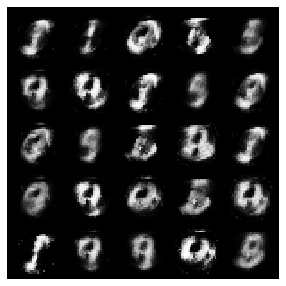

[Epoch 8/200] [Batch 496/938] [D loss: -0.220434] [G loss: -1.191626]


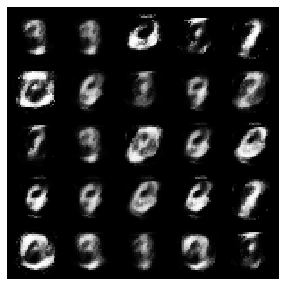

[Epoch 9/200] [Batch 58/938] [D loss: -0.243461] [G loss: -1.072187]


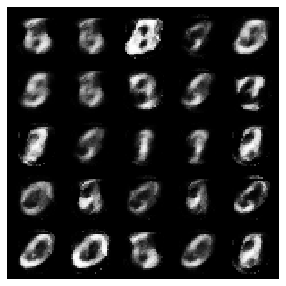

[Epoch 9/200] [Batch 558/938] [D loss: -0.316558] [G loss: -0.742090]


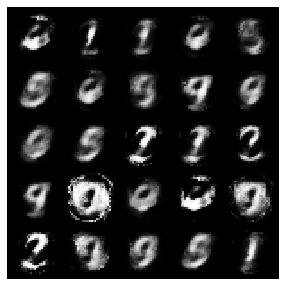

[Epoch 10/200] [Batch 120/938] [D loss: -0.376738] [G loss: -1.414269]


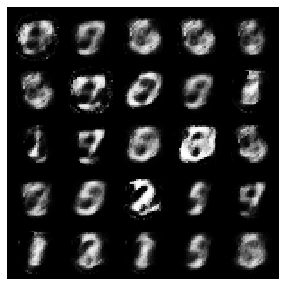

[Epoch 10/200] [Batch 620/938] [D loss: -0.240264] [G loss: -1.576368]


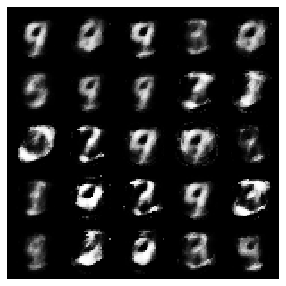

[Epoch 11/200] [Batch 182/938] [D loss: -0.372023] [G loss: -0.648960]


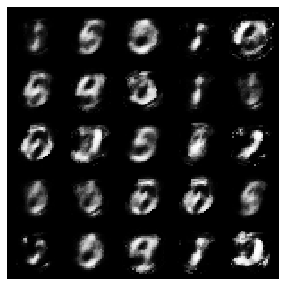

[Epoch 11/200] [Batch 682/938] [D loss: -0.265950] [G loss: -0.553994]


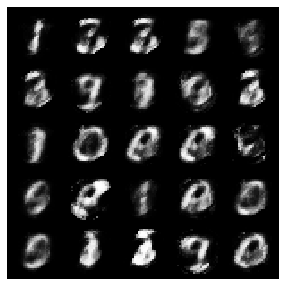

[Epoch 12/200] [Batch 244/938] [D loss: -0.274981] [G loss: -1.236655]


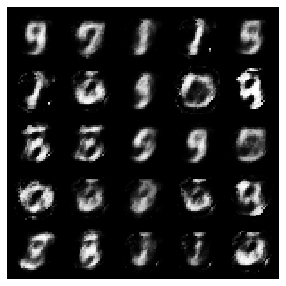

[Epoch 12/200] [Batch 744/938] [D loss: -0.310350] [G loss: -0.889405]


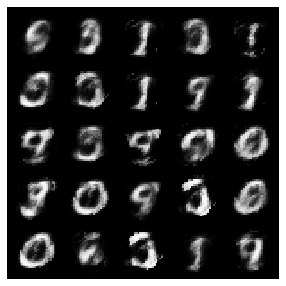

[Epoch 13/200] [Batch 306/938] [D loss: -0.264415] [G loss: -0.518976]


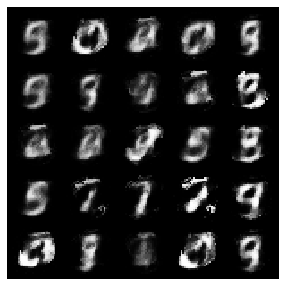

[Epoch 13/200] [Batch 806/938] [D loss: -0.251042] [G loss: -0.802579]


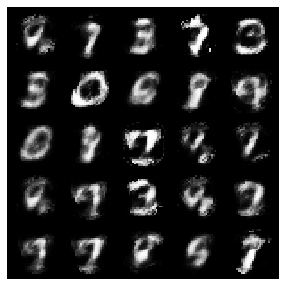

[Epoch 14/200] [Batch 368/938] [D loss: -0.256739] [G loss: -0.457550]


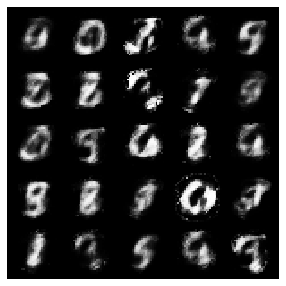

[Epoch 14/200] [Batch 868/938] [D loss: -0.327121] [G loss: -0.750685]


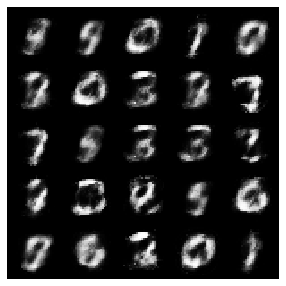

[Epoch 15/200] [Batch 430/938] [D loss: -0.277631] [G loss: -0.649196]


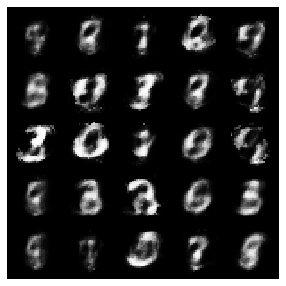

[Epoch 15/200] [Batch 930/938] [D loss: -0.278941] [G loss: -0.919410]


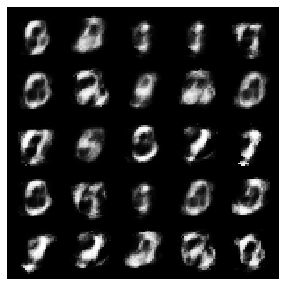

[Epoch 16/200] [Batch 492/938] [D loss: -0.284303] [G loss: 0.015863]


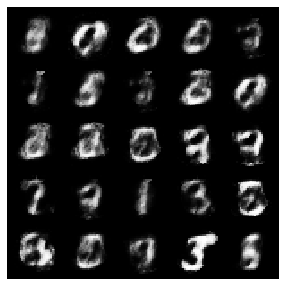

[Epoch 17/200] [Batch 54/938] [D loss: -0.271015] [G loss: -0.615434]


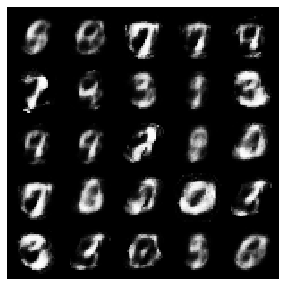

[Epoch 17/200] [Batch 554/938] [D loss: -0.309183] [G loss: -0.003303]


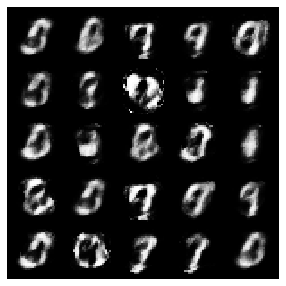

[Epoch 18/200] [Batch 116/938] [D loss: -0.304094] [G loss: -0.026088]


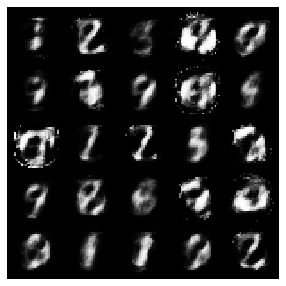

[Epoch 18/200] [Batch 616/938] [D loss: -0.300992] [G loss: -0.815632]


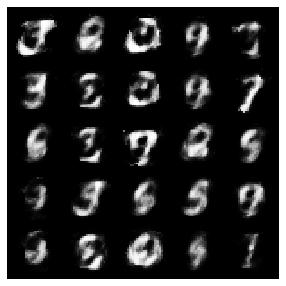

[Epoch 19/200] [Batch 178/938] [D loss: -0.261677] [G loss: -0.104714]


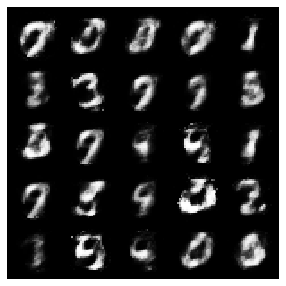

[Epoch 19/200] [Batch 678/938] [D loss: -0.263343] [G loss: -0.352140]


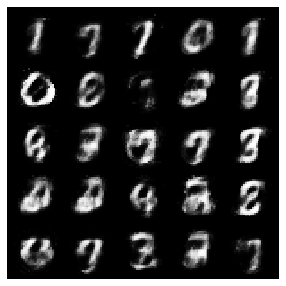

[Epoch 20/200] [Batch 240/938] [D loss: -0.292727] [G loss: -0.096049]


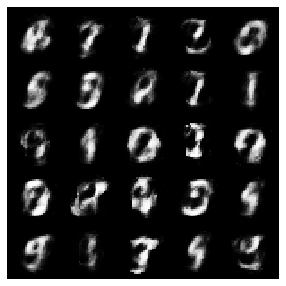

[Epoch 20/200] [Batch 740/938] [D loss: -0.278520] [G loss: -0.503801]


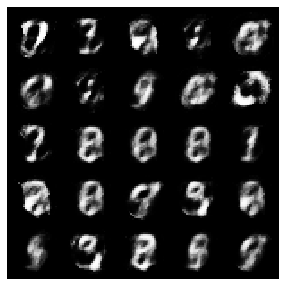

[Epoch 21/200] [Batch 302/938] [D loss: -0.249025] [G loss: -0.354392]


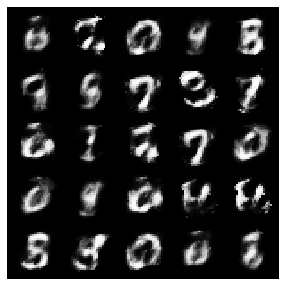

[Epoch 21/200] [Batch 802/938] [D loss: -0.282824] [G loss: -0.443035]


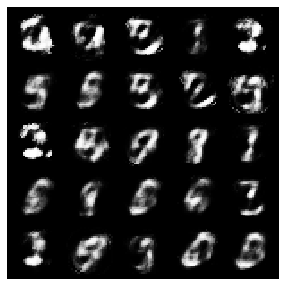

[Epoch 22/200] [Batch 364/938] [D loss: -0.315923] [G loss: -0.294838]


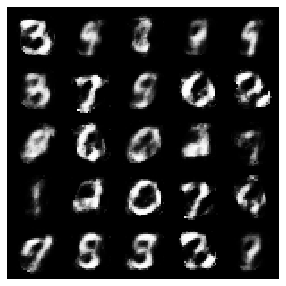

[Epoch 22/200] [Batch 864/938] [D loss: -0.268579] [G loss: -0.025010]


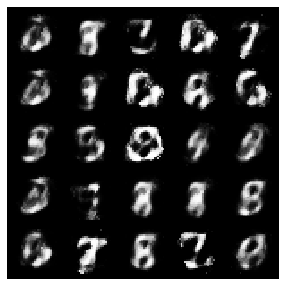

[Epoch 23/200] [Batch 426/938] [D loss: -0.282877] [G loss: -0.346867]


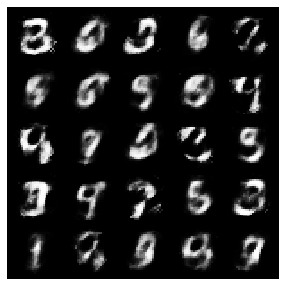

[Epoch 23/200] [Batch 926/938] [D loss: -0.339741] [G loss: 0.201996]


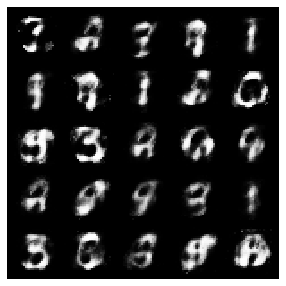

[Epoch 24/200] [Batch 488/938] [D loss: -0.296476] [G loss: -0.207494]


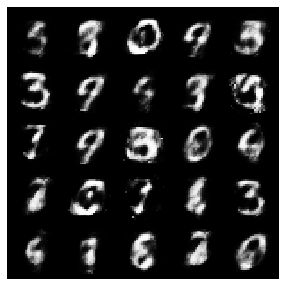

KeyboardInterrupt: ignored

In [ ]:

# ----------
#  Training
# ----------

batches_done = 0
for epoch in range(opt.n_epochs):

    for i, (imgs, _) in enumerate(dataloader):

        # Configure input
        real_imgs = Variable(imgs.type(Tensor))

        # ---------------------
        #  Train Discriminator
        # ---------------------

        optimizer_D.zero_grad()

        # Sample noise as generator input
        z = Variable(Tensor(np.random.normal(0, 1, (imgs.shape[0], opt.latent_dim))))

        # Generate a batch of images
        fake_imgs = generator(z).detach()
        # Adversarial loss
        loss_D = -torch.mean(discriminator(real_imgs)) + torch.mean(discriminator(fake_imgs))

        loss_D.backward()
        optimizer_D.step()

        # Clip weights of discriminator
        for p in discriminator.parameters():
            p.data.clamp_(-opt.clip_value, opt.clip_value)

        # Train the generator every n_critic iterations
        if i % opt.n_critic == 0:

            # -----------------
            #  Train Generator
            # -----------------

            optimizer_G.zero_grad()

            # Generate a batch of images
            gen_imgs = generator(z)
            # Adversarial loss
            loss_G = -torch.mean(discriminator(gen_imgs))

            loss_G.backward()
            optimizer_G.step()


        batches_done = epoch * len(dataloader) + i
        if batches_done % opt.sample_interval == 0:
            print(
                "[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f]"
                % (epoch, opt.n_epochs, batches_done % len(dataloader), len(dataloader), loss_D.item(), loss_G.item())
            )

            save_image(gen_imgs.data[:25], "images/%d.png" % batches_done, nrow=5, normalize=True)

            plt.figure(figsize = (5,5))
            img1 = cv2.imread("images/%d.png" %batches_done)
            plt.imshow(img1, interpolation='nearest')
            plt.axis('off')
            plt.show()